In [ ]:
from analysis_utils import get_roi_masks
from analysis_utils import extract_traces
from glob import glob
from roifile import ImagejRoi
from skimage import draw
from wfield.io import mmap_dat

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import tifffile as tiff

In [3]:
root = '/home/wrx/Data_WF/WF_WRX'
mouse_id = 'H1'
date = '20250305'
date_folder = os.path.join(root, mouse_id, date)
treatment = 'DOM'
folder = os.path.join(date_folder, treatment)

(460, 430)


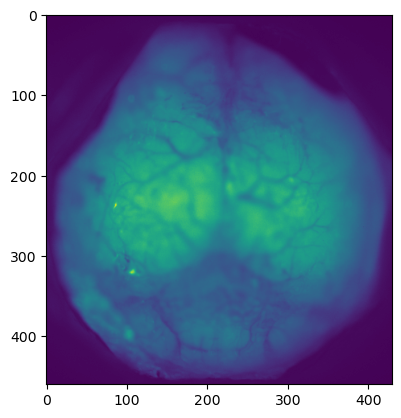

In [4]:
reference_file = os.path.join(folder, 'reference.tif')
reference_image = tiff.imread(reference_file)
image_size = reference_image[0].shape
print(image_size)
plt.imshow(reference_image[0])
plt.show()

In [5]:
rois_name = 'RoiSet.zip'
rois_path = os.path.join(folder, rois_name)
print(rois_path)

/home/wrx/Data_WF/WF_WRX/H1/20250305/DOM/RoiSet.zip


In [ ]:
roi_masks = get_roi_masks(rois_path)

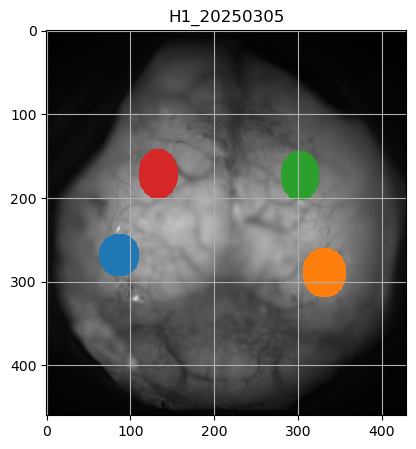

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.imshow(reference_image[0], cmap='gray')
ax.grid()
for i, roi_mask in enumerate(roi_masks):
    ax.scatter(roi_mask[1], roi_mask[0], s=1, label=f'ROI {i+1}')

ax.set_aspect('equal')
# ax.legend()
title = '{}_{}'.format(mouse_id, date)
ax.set_title(title)
plt.show()

In [11]:
dat = mmap_dat(glob(os.path.join(folder, '*uint16.bin'))[0])
print(dat.shape)

(35986, 2, 460, 430)


In [13]:
def extract_traces(data, roi_masks):
    '''
    data: np.ndarray, shape (n_frames, height, width)
    roi_masks: list of np.ndarray, each shape (2, n_pixels)
    '''
    traces = []
    for _mask in tqdm(roi_masks):
        _sum = data[:, _mask[0], _mask[1]].sum(axis=1)
        
        traces.append(_sum / _mask.shape[1])
    traces = np.array(traces)
    return traces

In [14]:
F_chan1 = extract_traces(dat[:, 0], roi_masks)
F_chan2 = extract_traces(dat[:, 1], roi_masks)

100%|██████████| 4/4 [03:37<00:00, 54.32s/it] 


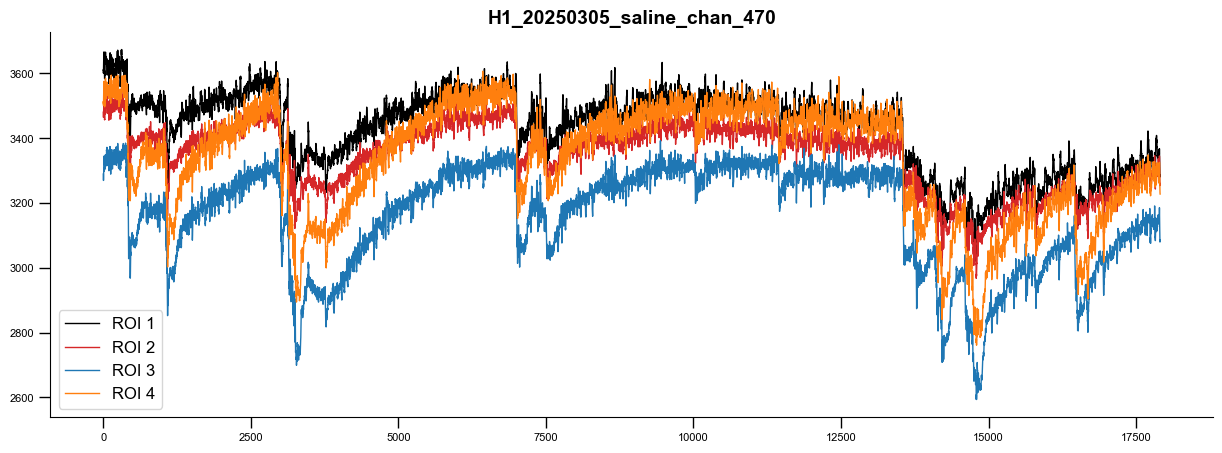

In [93]:
fig, ax = plt.subplots(figsize=(15, 5))
for i, trace in enumerate(F_chan1):
    ax.plot(trace, lw=1, label=f'ROI {i+1}')
ax.legend()
title = '{}_{}_{}_{}'.format(mouse_id, date, treatment, 'chan_470')
ax.set_title(title)
plt.show()

In [16]:
from visualization_utils import plot_traces

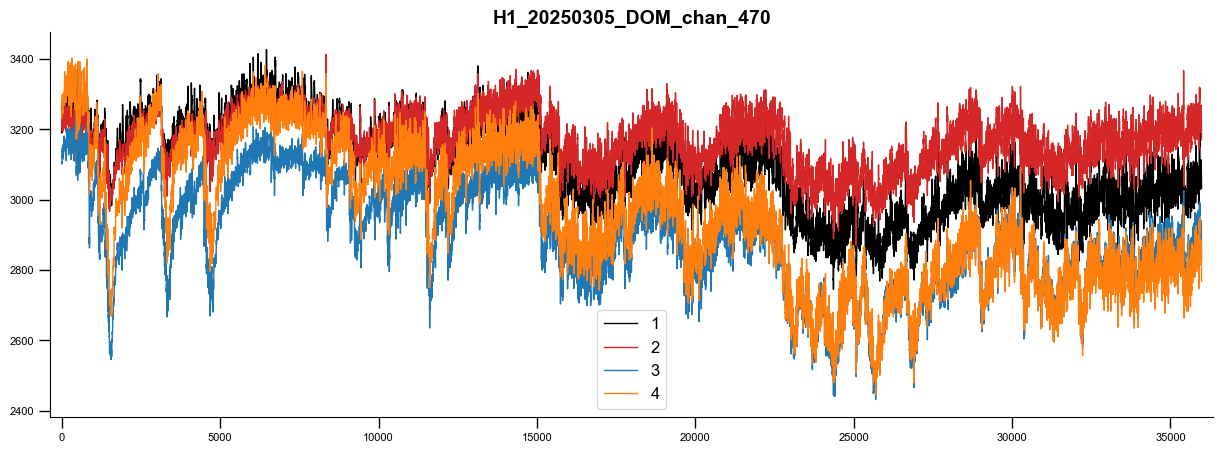

In [ ]:
title = f'{mouse_id}_{date}_{treatment}_chan_470'
plot_traces(F_chan1.T, title=title)
title = f'{mouse_id}_{date}_{treatment}_chan_405'
plot_traces(F_chan2.T, title=title)

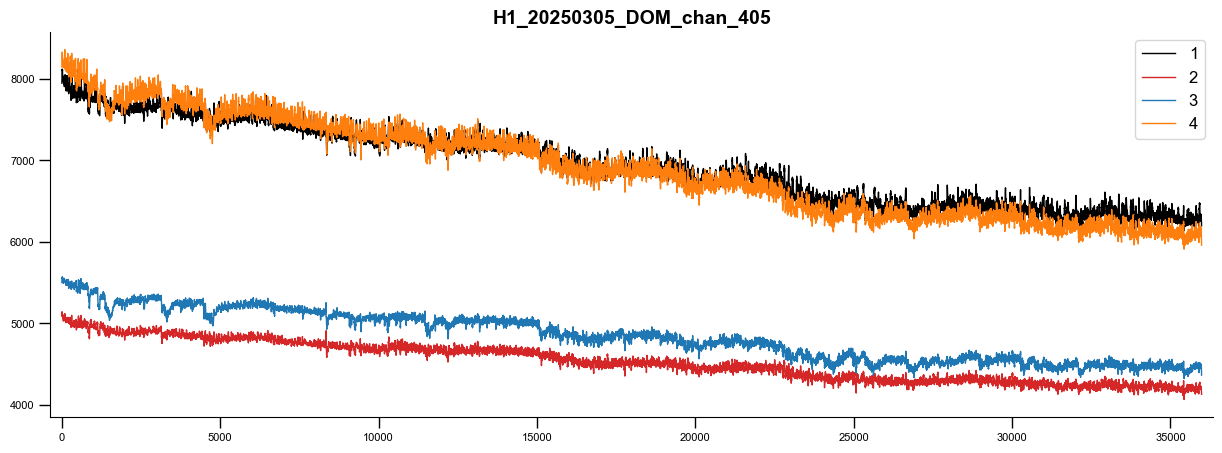

In [37]:
title = f'{mouse_id}_{date}_{treatment}_chan_405'
plot_traces(F_chan2.T, title=title)